In [2]:
import pandas as pd
from collections import Counter
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
from scipy.spatial.distance import jensenshannon 
from numpy import asarray
import mpltern as mp

# One id

In [7]:
#charging datasets
#jpred_oneid_df=pd.read_csv('./pdb/jpred/jpred_oneid.tsv', sep='\t', names=['pdb_id','sequence','secondary_structure', 'len'])
#phyre_oneid=pd.read_csv('./pdb/phyre/phyreoneid.tsv', sep='\t', names=['pdb_id','sequence','secondary_structure', 'len'])
pep2d_oneid=pd.read_csv('./pdb/pep2d/pep2d_one.csv')

In [10]:
pep2d_oneid.shape

(261, 7)

In [10]:
def ss_percentage(df, column):
    '''This function calculates ss percentage (C,H,E) from string
        DataFrame must contain a column named 'len' with the length of all sequences
        param: df=dataframe containing ss calculations
        param: column= column corresponding to ss
        return: none (dataframe updated with ss%) 
    '''
    ss_list=df[column].tolist()
    helix_count=[]
    coil_count=[]
    strand_count=[]
    
    for i in range(len(ss_list)):
        coil_count.append(ss_list[i].count('C'))
        helix_count.append(ss_list[i].count('H'))
        strand_count.append(ss_list[i].count('E'))
    
    helix_percent=[]
    coil_percent=[]
    strand_percent=[]
    len_df=df['len'].tolist()
    
    for j in range(len(coil_count)):
        coil_percent.append(round(coil_count[j]/len_df[j]*100, 3))
        helix_percent.append(round(helix_count[j]/len_df[j]*100, 3))
        strand_percent.append(round(strand_count[j]/len_df[j]*100, 3))
    
    df['helix%']=helix_percent
    df['strand%']=strand_percent
    df['coil%']=coil_percent
    
    return None


In [11]:
#calculating percentage
ss_percentage(df=jpred_oneid_df, column='secondary_structure')
ss_percentage(df=phyre_oneid, column='secondary_structure')

NameError: name 'phyre_oneid' is not defined

In [ ]:
#saving DF with calculated percentages
#phyre_oneid.to_csv('./pdb/phyre/oneid_prc.csv')
#jpred_oneid_df.to_csv('./pdb/jpred/oneid_prc.csv')

In [8]:
phyre_oneid_df=pd.read_csv('./pdb/phyre/oneid_prc.csv', index_col=0)
jpred_oneid_df=pd.read_csv('./pdb/jpred/oneid_prc.csv', index_col=0)

In [3]:
pdbe_oneid=pd.read_csv('./pdb/pdbe/oneid_pdbe.csv')

In [6]:
pdbe_oneid[pdbe_oneid['strand%']>=70]

,pdb_id,sequence,length,helix_count,strand_count,coil_count,helix%,strand%,coil%
88,2jsb,RWCVYAYVRVRGVLVRYRRCW,21,0,18,3,0.0,85.714,14.286
144,2n1e,VKVKVKVKVPPTKVKVKVKV,20,0,16,4,0.0,80.000,20.000
161,2ny8,ATCDLASGFGVGSSLCAAHCIARRYRGGYCNSKAVCVCRN,40,9,29,2,22.5,72.500,5.000
203,5m9u,RWCVYAYRRVRGVLVRYRRCW,21,0,18,3,0.0,85.714,14.286
208,5v11,GFCWYVCARRNGARVCYRRCN,21,0,19,2,0.0,90.476,9.524
215,5y0i,GFCWNVCVYRNGVRVCHRRCN,21,0,18,3,0.0,85.714,14.286
216,5y0j,AFCWNVCVYRNAVRVCHRRCN,21,0,16,5,0.0,76.190,23.810


# KL Divergence & Shannon Entropy

In [14]:
def list_to_array(df,column):
    your_list=df[column].tolist()
    your_list=asarray([round(i/100,4) for i in your_list])
    return your_list

In [15]:
jpredhelix=list_to_array(df=jpred_oneid_df, column='helix%')
jpredstrand=list_to_array(df=jpred_oneid_df, column='strand%')
jpredcoil=list_to_array(df=jpred_oneid_df, column='coil%')

phyrehelix=list_to_array(df=phyre_oneid_df, column='helix%')
phyrestrand=list_to_array(df=phyre_oneid_df, column='strand%')
phyrecoil=list_to_array(df=phyre_oneid_df, column='coil%')

pep2dhelix=list_to_array(df=pep2d_oneid, column='helix%')
pep2dstrand=list_to_array(df=pep2d_oneid, column='sheet%')
pep2dcoil=list_to_array(df=pep2d_oneid, column='coil%')

pdbehelix=list_to_array(df=pdbe_oneid, column='helix%')
pdbestrand=list_to_array(df=pdbe_oneid, column='strand%')
pdbecoil=list_to_array(df=pdbe_oneid, column='coil%')

In [16]:
print(jpredstrand.min())
print(jpredstrand.max())

0.0
0.8095


In [17]:
js_jpred_helix=jensenshannon(p=pdbehelix, q=jpredhelix, base=2)
js_jpred_strand=jensenshannon(p=pdbestrand, q=jpredstrand, base=2)
js_jpred_coil=jensenshannon(p=pdbecoil, q=jpredcoil, base=2)

js_phyre_helix=jensenshannon(p=pdbehelix, q=phyrehelix, base=2)
js_phyre_strand=jensenshannon(p=pdbestrand, q=phyrestrand, base=2)
js_phyre_coil=jensenshannon(p=pdbecoil, q=phyrecoil, base=2)

js_pep2d_helix=jensenshannon(p=pdbehelix, q=pep2dhelix, base=2)
js_pep2d_strand=jensenshannon(p=pdbestrand, q=pep2dstrand, base=2)
js_pep2d_coil=jensenshannon(p=pdbecoil, q=pep2dcoil, base=2)

In [18]:
print('JS(P || Q) Distance: %.3f' % js_jpred_helix)


JS(P || Q) Distance: 0.357


In [19]:
js_jpred_coil=jensenshannon(p=pdbecoil, q=jpredcoil, base=2)
js_jpred_coil

0.2291643120538916

# Graphs 

In [20]:
pdb_pep2d=pd.read_csv('./pdb/benchmark/pdb_pep2d.csv')
pdb_jpred=pd.read_csv('./pdb/benchmark/pdb_jpred.csv')
pdb_phyre=pd.read_csv('./pdb/benchmark/pdb_phyre.csv')

In [21]:
pdb_pep2d

,percentage,type,motif
0,38.462,PDBe,helix
1,36.667,PDBe,helix
2,22.000,PDBe,helix
3,0.000,PDBe,helix
4,0.000,PDBe,helix
...,...,...,...
1561,46.810,PEP2D,coil
1562,53.190,PEP2D,coil
1563,70.000,PEP2D,coil
1564,53.330,PEP2D,coil


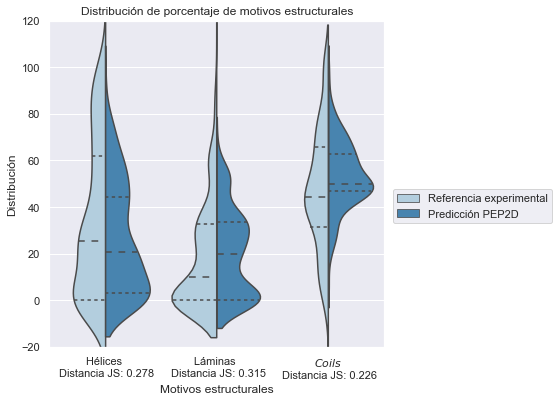

In [23]:
fig=plt.gcf()
fig.set_size_inches(6,6)
g=sns.violinplot(data=pdb_pep2d, y="percentage", x='motif', hue='type', split=True, inner='quartile', palette='Blues')
g.set(ylim=(-20,120))
plt.title('Distribución de porcentaje de motivos estructurales')
plt.xlabel('Motivos estructurales')
plt.ylabel('Distribución')
sns.set_theme(style="darkgrid")
g.legend(handles=g.legend_.legendHandles, labels=['Referencia experimental', 'Predicción PEP2D'], bbox_to_anchor=(1.01, 0.5))
g.set_xticklabels(['Hélices \n Distancia JS: %.3f' % js_pep2d_helix, 'Láminas \n Distancia JS: %.3f' % js_pep2d_strand, '$\it{Coils}$ \n Distancia JS: %.3f' % js_pep2d_coil])
plt.show()
fig.savefig('PEPD2D_bench.pdf', bbox_inches='tight')

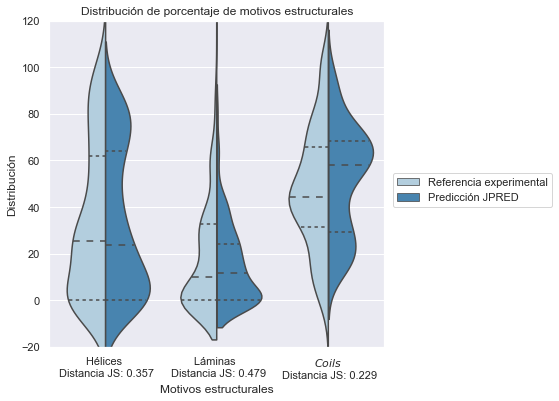

In [24]:
fig=plt.gcf()
fig.set_size_inches(6,6)
g=sns.violinplot(data=pdb_jpred, y="percentage", x='motif', hue='type', split=True, inner='quart', palette='Blues', bw='silverman')
g.set(ylim=(-20,120))
plt.title('Distribución de porcentaje de motivos estructurales')
plt.xlabel('Motivos estructurales')
plt.ylabel('Distribución')
sns.set_theme(style="whitegrid")
g.legend(handles=g.legend_.legendHandles, labels=['Referencia experimental', 'Predicción JPRED'], bbox_to_anchor=(1.01, 0.55))
g.set_xticklabels(['Hélices \n Distancia JS: %.3f' % js_jpred_helix, 'Láminas \n Distancia JS: %.3f' % js_jpred_strand, '$\it{Coils}$ \n Distancia JS: %.3f' % js_jpred_coil])
plt.show()
fig.savefig('JPRED_bench.pdf', bbox_inches='tight')

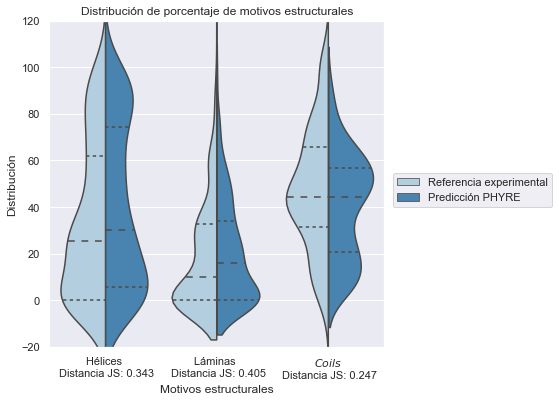

In [26]:
fig=plt.gcf()
fig.set_size_inches(6,6)
g=sns.violinplot(data=pdb_phyre, y="percentage", x='motif', hue='type', split=True, inner='quart', palette='Blues', bw='silverman')
g.set(ylim=(-20,120))
plt.title('Distribución de porcentaje de motivos estructurales')
plt.xlabel('Motivos estructurales')
plt.ylabel('Distribución')
sns.set_theme(style="darkgrid")
g.legend(handles=g.legend_.legendHandles, labels=['Referencia experimental', 'Predicción PHYRE'], bbox_to_anchor=(1.01, 0.55))
g.set_xticklabels(['Hélices \n Distancia JS: %.3f' % js_phyre_helix, 'Láminas \n Distancia JS: %.3f' % js_phyre_strand, '$\it{Coils}$ \n Distancia JS: %.3f' % js_phyre_coil])
plt.show()
fig.savefig('PHYRE_bench.pdf', bbox_inches='tight')

In [48]:
import plotly.express as px

df = pd.DataFrame({'Hélices':pdbehelix, 'Láminas':pdbestrand, 'Coil':pdbecoil})

fig = px.scatter_ternary(df, a='Hélices', b='Láminas', c='Coil')

fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Estructuras PDBe por composición de motivos estructurales',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()

In [11]:
grampa_pep2d=pd.read_csv('./data/grampa_pep2d.csv')

In [19]:
import plotly.express as px


fig = px.scatter_ternary(grampa_pep2d, a='helix%', b='sheet%', c='coil%')

fig.update_traces(marker=dict(size=4),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Estructuras de secuencias GRAMPA por composición de motivos estructurales',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()

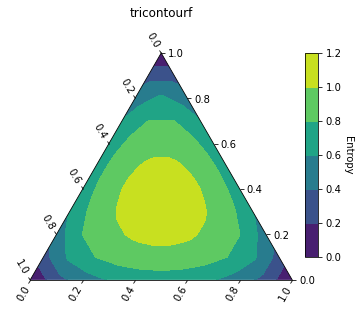

In [11]:
import numpy as np

import matplotlib.pyplot as plt
from mpltern.ternary.datasets import get_shanon_entropies

t, l, r, v = get_shanon_entropies()

fig = plt.figure(figsize=(10.8, 4.8))
fig.subplots_adjust(left=0.075, right=0.85, wspace=0.3)

pad_title = 36

# These values are for controlling the color-bar scale, and here they are
# explicitly given just to make the same color-bar scale for all the plots.
# In general, you may not need to explicitly specify them.
vmin = 0.0
vmax = 1.2
levels = np.linspace(vmin, vmax, 7)

ax = fig.add_subplot(1, 2, 2, projection='ternary')
cs = ax.tricontourf(t, l, r, v, levels=levels)
ax.set_title("tricontourf", pad=pad_title)

cax = ax.inset_axes([1.05, 0.1, 0.05, 0.9], transform=ax.transAxes)
colorbar = fig.colorbar(cs, cax=cax)
colorbar.set_label('Entropy', rotation=270, va='baseline')

plt.show()


In [32]:
grampahelix=list_to_array(df=grampra_pep2d_50, column='Helix%')
grampacoil=list_to_array(df=grampra_pep2d_50, column='Coil%')
grampasheet=list_to_array(df=grampra_pep2d_50, column='Sheet%')

In [2]:
grampa=pd.read_csv('./grampa_AA.csv', index_col=0)
grampa=grampa[grampa["has_unusual_modification"]==False]

In [32]:
grampa=grampa[(grampa['sequence_len']<=50) & (grampa['sequence_len']>=5)]

In [33]:
grampa_seq=grampa['sequence'].tolist()
pep2d_seq=grampa_pep2d['sequence'].tolist()
rem=[]
[rem.append(i) for i in grampa_seq if i not in rem]
len(rem)

5931

In [34]:
grampa_ecoli=grampa[(grampa['bacterium']=='E. coli')]
grampa_saureus=grampa[(grampa['bacterium']=='S. aureus')]
grampa_paeruginosa=grampa[(grampa['bacterium']=='P. aeruginosa')]

In [40]:
Counter(grampa_ecoli.sequence).most_common(n=10)

[('SMLSVLKNLGKVGLGFVACKINKQC', 16),
 ('SMLSVLKKLGKVGLGFVACKINKQC', 13),
 ('GWKKWLRKGAKHLGQAAIK', 12),
 ('GNNRPVYIPQPRPPHPRI', 11),
 ('GRFKRFRKKFKKLFKKLSPVIPLLHLG', 10),
 ('FLGLLFHGVHHVGKWIHGLIHGHH', 10),
 ('RWGKWFKKATHVGKHVGKAALTAYL', 10),
 ('WLRRIGKGVKIIGGAALDHL', 10),
 ('GRFRRLRKKTRKRLKKIGKVLKWIPPIVGSIPLG', 10),
 ('GWGSIFKHGRHAAKHIGHAAVNHYL', 9)]

In [36]:
ecoli_structure=grampa_ecoli.merge(grampa_pep2d, on='sequence', how='left')

In [45]:
saureus_structure = grampa_saureus.merge(grampa_pep2d, on='sequence', how='left')
paeruginosa_structure = grampa_paeruginosa.merge(grampa_pep2d, on='sequence', how='left')

In [50]:
ecoli_structure.to_csv('./Data/ecoli_structure.csv')
saureus_structure.to_csv('./Data/saureus_structure.csv')
paeruginosa_structure.to_csv('./Data/paeruginosa_structure.csv')

In [5]:
sec_test=['VLNANLLR','VLIKTRLFIKRK','LNWKAILKHIIK','VLPKVMAHMK','LNWGAVLKHVVK','LILKRKRKRKRILI','LNWGAIKKHIIK','VLNENLLA','LNWGAFLKHFFK','VLNENLLH','VLNENAAR','VLNENLRR','VLNENLLR','VDLKNLLK','VALNENLLR','LRRLRLRLLRLLRRLLRLL','VLNNLLR','VLNENLAA','VLNEALLR','LNWGAWLKHWWK','LVKRVKKVL','VNLKNLLR','KWKLWKKIEKWGQGIGAVLKWLTTWL','KWKSFLKTFKSPVKTVFYTALKPISS','KWKSFIKKLTSVLKKVVTTAKPLISS','KWKSFIKKLTSAAKKVVTTAKPLISS','KWKSFLKTFKSPARTVLHTALKPISS','KWKSFIKKLTSAAKKVLTTGLPALIS','KWKSFLKKLTSAAKKVLTTALKPISS','KWKSFLKTFKSAVKTVLHTALKAISS','FIGGLRRLFATVVGTVVGAINKLGGG','KFFKKLKKAVKKGFKKFAKV','FFFHIIKGLFHAGRMIHGLV','FFFKLLPKAIGALKKI','FKIKASKKLLKKVGKGALGAVAKALAQQA','KWKKFIKKLTSAAKKVLTTGLPALIS','KWKKFLKKLTSAAKKVLTTALKPISS','FFKKFIGGVAKIAGKAAPHGVGQLIPHVTP']

In [14]:
for i in range(len(sec_test)):
    print('>sec_test'+ str(i) + '\n'+ sec_test[i])

>sec_test0
VLNANLLR
>sec_test1
VLIKTRLFIKRK
>sec_test2
LNWKAILKHIIK
>sec_test3
VLPKVMAHMK
>sec_test4
LNWGAVLKHVVK
>sec_test5
LILKRKRKRKRILI
>sec_test6
LNWGAIKKHIIK
>sec_test7
VLNENLLA
>sec_test8
LNWGAFLKHFFK
>sec_test9
VLNENLLH
>sec_test10
VLNENAAR
>sec_test11
VLNENLRR
>sec_test12
VLNENLLR
>sec_test13
VDLKNLLK
>sec_test14
VALNENLLR
>sec_test15
LRRLRLRLLRLLRRLLRLL
>sec_test16
VLNNLLR
>sec_test17
VLNENLAA
>sec_test18
VLNEALLR
>sec_test19
LNWGAWLKHWWK
>sec_test20
LVKRVKKVL
>sec_test21
VNLKNLLR
>sec_test22
KWKLWKKIEKWGQGIGAVLKWLTTWL
>sec_test23
KWKSFLKTFKSPVKTVFYTALKPISS
>sec_test24
KWKSFIKKLTSVLKKVVTTAKPLISS
>sec_test25
KWKSFIKKLTSAAKKVVTTAKPLISS
>sec_test26
KWKSFLKTFKSPARTVLHTALKPISS
>sec_test27
KWKSFIKKLTSAAKKVLTTGLPALIS
>sec_test28
KWKSFLKKLTSAAKKVLTTALKPISS
>sec_test29
KWKSFLKTFKSAVKTVLHTALKAISS
>sec_test30
FIGGLRRLFATVVGTVVGAINKLGGG
>sec_test31
KFFKKLKKAVKKGFKKFAKV
>sec_test32
FFFHIIKGLFHAGRMIHGLV
>sec_test33
FFFKLLPKAIGALKKI
>sec_test34
FKIKASKKLLKKVGKGALGAVAKALAQQA
>sec_test35
KWKK

In [6]:
grampa_org=pd.read_csv('./grampa.csv', index_col=0)

In [7]:
grampa_org

,bacterium,modifications,sequence,strain,unit,url_source,value,is_modified,has_unusual_modification,has_cterminal_amidation,datasource_has_modifications,database,len
0,B. subtilis,[disulfide],GLPRKILCAIAKKKGKCKGPLKLVCKC,NaN,uM,http://aps.unmc.edu/AP/database/query_output.p...,-0.397940,True,False,False,True,APD,27
1,S. agalactiae,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,NaN,uM,http://aps.unmc.edu/AP/database/query_output.p...,-1.859819,True,False,False,True,APD,42
2,S. aureus,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC29213,uM,http://aps.unmc.edu/AP/database/query_output.p...,0.566150,True,False,False,True,APD,42
3,S. pneumonia,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC49619,uM,http://aps.unmc.edu/AP/database/query_output.p...,-1.240030,True,False,False,True,APD,42
4,S. epidermidis,[disulfide],GFGCPGDAYQCSEHCRALGGGRTGGYCAGPWYLGHPTCTCSF,ATCC12228,uM,http://aps.unmc.edu/AP/database/query_output.p...,0.566150,True,False,False,True,APD,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62489,C. albicans,[],LNKGAILKHIIK,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,2.000000,False,False,False,False,YADAMP,12
62490,S. aureus,[],GCSRWIIGIHGQICRD,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,1.491362,False,False,False,False,YADAMP,16
62491,E. coli,[],GCSRWIIGIHGQICRD,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,2.301030,False,False,False,False,YADAMP,16
62492,B. subtilis,[],GCSRWIIGIHGQICRD,NaN,uM,http://www.yadamp.unisa.it/showItem.aspx?yadam...,0.602060,False,False,False,False,YADAMP,16


In [8]:
grampa_org=grampa_org[~grampa_org.sequence.str.contains('C')]

In [9]:
grampa_org_test=grampa_org[(grampa_org['len']<=40) & (grampa_org['bacterium']=='E. coli') & (grampa_org['modifications'].isin(['[C-Terminus: AMD]','[]']))]

In [10]:
cnt=0
seq_unique=[]
seq_test=grampa_org_test['sequence'].tolist()
for i in range(0, len(seq_test)):
    if seq_test[i] not in seq_unique:
        seq_unique.append(seq_test[i])
        cnt =+ 1

print(cnt, len(seq_unique))

1 3362


In [1]:
import pandas as pd

In [18]:
df = pd.read_csv('./Data/multid_test1.csv')
df

,pdb_id,sequence,sequence_length,helix_residues,sheet_residues,coil_residue,helix%,sheet%,coil%,method
0,1kj5,DHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK,36.0,0.0,10.0,26.0,0.00,27.78,72.22,SOLUTION_NMR
1,1e4s,DHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK,36.0,0.0,8.0,28.0,0.00,22.22,77.78,SOLUTION_NMR
2,1ijv,DHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK,36.0,8.0,12.0,16.0,22.22,33.33,44.44,X-RAY_DIFFRACTION
3,1iju,DHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK,36.0,8.0,14.0,14.0,22.22,38.89,38.89,X-RAY_DIFFRACTION
4,grampa_x,DHYNCVSSGGQCLYSACPIFTKIQGTCYRGKAKCCK,NaN,NaN,NaN,NaN,16.67,33.33,50.00,PEP2D


In [12]:
import plotly.express as px

df = pd.read_csv('./Data/multid_test1.csv')

fig = px.scatter_ternary(df, a='helix%', b='sheet%', c='coil%', color='method')

fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Diferencias de composición de estructura secundaria por método experimental',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()

In [17]:
import plotly.express as px

df = pd.read_csv('./Data/multid_test2.csv')

fig = px.scatter_ternary(df, a='helix%', b='sheet%', c='coil%', color='method')

fig.update_traces(marker=dict(size=15),
                  selector=dict(mode='markers'))

def makeAxis(title, tickangle):
    return {
      'title': title,
      'titlefont': { 'size': 20 },
      'tickangle': tickangle,
      'tickfont': { 'size': 15 },
      'tickcolor': 'rgba(0,0,0,0)',
      'ticklen': 5,
      'showline': True,
      'showgrid': True
    }
fig.update_layout(
{
    'ternary': {
        'sum': 100,
        'aaxis': makeAxis('Hélices', 0),
        'baxis': makeAxis('<br>Láminas', 45),
        'caxis': makeAxis('<br>Coils', -45)
    },
    'annotations': [{
      'showarrow': False,
      'text': 'Diferencias de composición de estructura secundaria por método experimental',
        'x': 0.5,
        'y': 1.20,
        'font': { 'size': 20 }
    }]
}
        ) 
fig.show()